In [395]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [396]:
def showNormImg(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Gambar Asli')    
    
def showHsvImg(hsv_image):
    plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Gambar HSV')
    
def showMaskImg(mask):
    plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Mask')
    
def showResultImg(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Hasil Akhir')
    
def maskingImg(hsv_image):
    # Membuat mask dengan rentang warna putih dalam HSV
    lower_white = np.array([-5, -1, 198])
    upper_white = np.array([35, 120, 268])
    
    mask = cv2.inRange(hsv_image, lower_white, upper_white)
    return mask

def findAndDrawRect(mask, image, min_area=20, max_area=1000, max_ratio=1.4):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    count = 0 
    
    for contour in contours:
        area = cv2.contourArea(contour)
        x, y, w, h = cv2.boundingRect(contour)
        ratio = h / w

        if area > min_area and area < max_area:
            ratio = h/w
            if ratio <= max_ratio:
                print(f"num {count} x:{x} y:{y} w:{w} h:{h} area:{area} ratio:{ratio}")
                cv2.rectangle(image,(x,y),(x+w , y+h),(0,255,0),2)
                count += 1
    return image

In [397]:
def process_image(imej):
    # Membaca gambar
    image = cv2.imread(imej)

    # Menampilkan gambar asli
    plt.subplot(1, 4, 1)
    showNormImg(image)

    # Mengubah gambar ke ruang warna HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    plt.subplot(1, 4, 2)
    showHsvImg(hsv_image)

    # Membuat mask dengan rentang warna putih dalam HSV
    mask = maskingImg(hsv_image)
    plt.subplot(1, 4, 3)
    showMaskImg(mask)

    image = findAndDrawRect(mask, image)

    # Menampilkan gambar hasil dengan kotak-kotak pada target
    plt.subplot(1, 4, 4)
    showResultImg(image)

    plt.tight_layout()  # Mengatur layout agar tidak tumpang tindih
    plt.show()

In [398]:
def process_images_dict(image_dict):
    num_images = len(image_dict)
    num_rows = num_images  # Setiap gambar di satu baris
    num_cols = 4  # Jumlah kolom (sesuai dengan jumlah langkah proses)

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

    for i, (key, imej) in enumerate(image_dict.items()):
        row = i  # Setiap gambar di satu baris
        col = 0

        # Membaca gambar
        image = cv2.imread(imej)

        # Menampilkan gambar asli
        axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[row, col].axis('off')
        axs[row, col].set_title(f'Gambar Asli ({key})')

        # Mengubah gambar ke ruang warna HSV
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        col += 1
        axs[row, col].imshow(cv2.cvtColor(hsv_image, cv2.COLOR_BGR2RGB))
        axs[row, col].axis('off')
        axs[row, col].set_title(f'Gambar HSV ({key})')

        # Membuat mask dengan rentang warna putih dalam HSV
        lower_white = np.array([-5, -1, 198])
        upper_white = np.array([35, 120, 268])
        mask = cv2.inRange(hsv_image, lower_white, upper_white)
        col += 1
        axs[row, col].imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
        axs[row, col].axis('off')
        axs[row, col].set_title(f'Mask ({key})')

        # Menemukan kontur dan menggambar kotak pada target
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        count = 0 
        for contour in contours:
            area = cv2.contourArea(contour)
            x, y, w, h = cv2.boundingRect(contour)
            if area > 20 and area < 1000:
                ratio = h / w
                if ratio <= 1.4:
                    print(f"num {count} x:{x} y:{y} w:{w} h:{h} area:{area} ratio:{ratio}")
                    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                    count += 1

        # Menampilkan gambar hasil dengan kotak-kotak pada target
        col += 1
        axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[row, col].axis('off')
        axs[row, col].set_title(f'Hasil Akhir ({key})')

    plt.tight_layout()
    plt.show()



num 0 x:41 y:92 w:16 h:17 area:38.5 ratio:1.0625


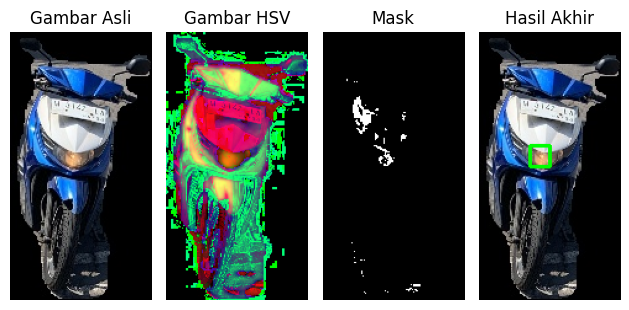

In [401]:
terang_kuning = {
    'cb': 'res/terang/nyala/105-4.jpg',
    'beat': 'res/terang/nyala/0-0.jpg',
    # 'mio': 'res/terang/nyala/121-0.jpg', #jelek kecil
    'mio': 'res/terang/nyala/126-12.jpg', #alt
}

# imej = terang_kuning['cb']
# imej = terang_kuning['beat']
imej = terang_kuning['mio']

image = cv2.imread(imej)
process_image(imej)

num 0 x:33 y:88 w:21 h:20 area:252.0 ratio:0.9523809523809523
num 1 x:28 y:19 w:13 h:7 area:22.5 ratio:0.5384615384615384


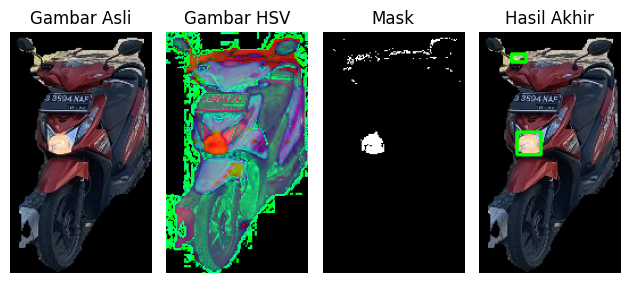

In [402]:
gelap_kuning = {
    'cb': 'res/gelap/nyala/187-0.jpg',
    'beat': 'res/gelap/nyala/183-5.jpg',
}

imej = gelap_kuning['cb']
imej = gelap_kuning['beat']

image = cv2.imread(imej)
process_image(imej)